In [1]:
from datasets import load_dataset

ds = load_dataset("hpe-ai/medical-cases-classification-tutorial")

Repo card metadata block was not found. Setting CardData to empty.


In [3]:
import pandas as pd
df = ds['train'].to_pandas()

In [4]:
df.head()

,description,transcription,sample_name,medical_specialty,keywords
0,Pacemaker ICD interrogation. Severe nonischem...,"PROCEDURE NOTE: , Pacemaker ICD interrogation....",Pacemaker Interrogation,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, cardiomyopathy, ve..."
1,"Erythema of the right knee and leg, possible s...","PREOPERATIVE DIAGNOSES: , Erythema of the righ...",Aspiration - Knee Joint,Orthopedic,"orthopedic, knee and leg, anterolateral portal..."
2,Left cardiac catheterization with selective ri...,"PREOPERATIVE DIAGNOSIS: , Post infarct angina....",Cardiac Cath & Selective Coronary Angiography,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, selective, angiogr..."
3,Patient with a history of coronary artery dise...,"REASON FOR VISIT: , Acute kidney failure.,HIST...",Acute Kidney Failure,Nephrology,None
4,Cardiac evaluation and treatment in a patient ...,"REASON FOR REFERRAL: , Cardiac evaluation and ...",Cardiac Consultation - 6,Cardiovascular / Pulmonary,None


In [5]:
df["medical_specialty"].unique()

array(['Cardiovascular / Pulmonary', 'Orthopedic', 'Nephrology',
       'Obstetrics / Gynecology', 'Ophthalmology', 'Gastroenterology',
       'Neurology', 'ENT - Otolaryngology', 'Psychiatry / Psychology',
       'Pediatrics - Neonatal', 'Neurosurgery', 'Hematology - Oncology',
       'Radiology'], dtype=object)

In [6]:
# 진료과별 개수 확인
specialty_counts = df['medical_specialty'].value_counts()
print(specialty_counts)

medical_specialty
Cardiovascular / Pulmonary    526
Orthopedic                    289
Neurology                     187
Gastroenterology              152
Obstetrics / Gynecology       126
Hematology - Oncology          86
Neurosurgery                   76
ENT - Otolaryngology           53
Pediatrics - Neonatal          51
Psychiatry / Psychology        49
Nephrology                     45
Ophthalmology                  45
Radiology                      39
Name: count, dtype: int64


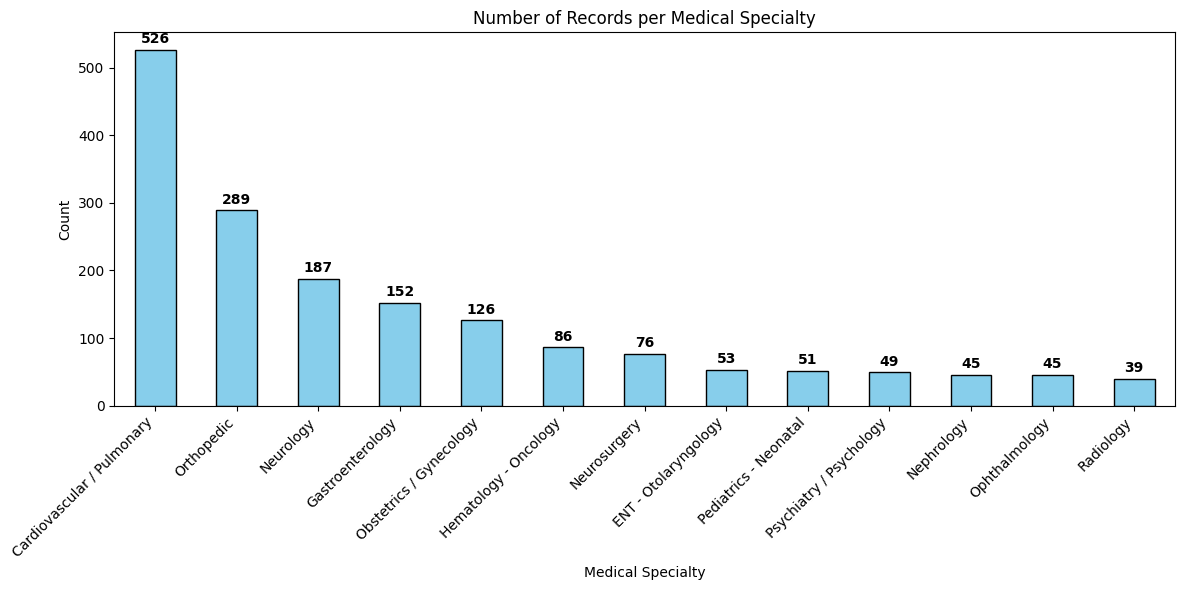

In [21]:
# 시각화
import matplotlib.pyplot as plt

# 진료과목별 개수
specialty_counts = df['medical_specialty'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
specialty_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 각 값 표시 (막대 위에 개수 텍스트 표시)
for i, count in enumerate(specialty_counts):
    plt.text(i, count + 10, str(count), ha='center', color='black', fontweight='bold')

# 제목, 레이블
plt.title("Number of Records per Medical Specialty")
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

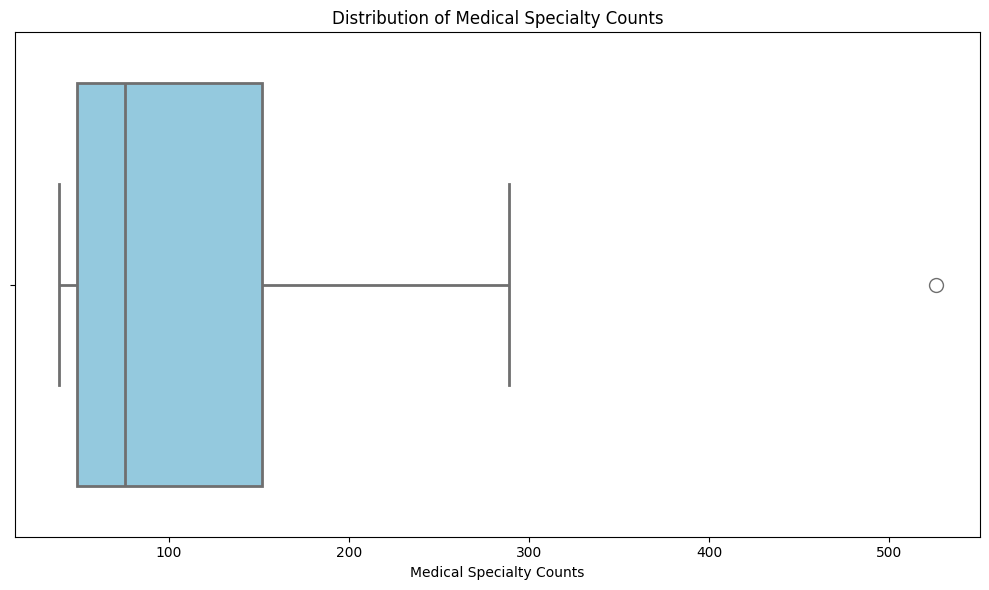

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 진료과목별 개수
specialty_counts = df['medical_specialty'].value_counts()

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=specialty_counts, color='skyblue', fliersize=10, linewidth=2)

# 제목, 레이블
plt.title("Distribution of Medical Specialty Counts")
plt.xlabel("Medical Specialty Counts")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.utils import resample

# 가장 많은 데이터를 가진 클래스 (Cardiovascular / Pulmonary)
majority_class = df[df['medical_specialty'] == 'Cardiovascular / Pulmonary']

# 샘플 수 50% 줄이기
majority_class_downsampled = resample(majority_class, 
                                      replace=False,    # 샘플을 중복 없이 선택
                                      n_samples=int(len(majority_class) * 0.5),    # 샘플 개수
                                      random_state=42)  # 재현성 확보

# 원본 데이터에서 해당 클래스만 다운샘플링한 후 나머지 데이터와 합치기
df = pd.concat([df[df['medical_specialty'] != 'Cardiovascular / Pulmonary'], majority_class_downsampled])

# 결과 확인
balanced_counts = df['medical_specialty'].value_counts()
print("Balanced Distribution (50% Sampling):\n", balanced_counts)

Balanced Distribution (50% Sampling):
 medical_specialty
Orthopedic                    289
Cardiovascular / Pulmonary    263
Neurology                     187
Gastroenterology              152
Obstetrics / Gynecology       126
Hematology - Oncology          86
Neurosurgery                   76
ENT - Otolaryngology           53
Pediatrics - Neonatal          51
Psychiatry / Psychology        49
Nephrology                     45
Ophthalmology                  45
Radiology                      39
Name: count, dtype: int64


In [27]:
# 너무 적은 데이터를 가진 클래스를 삭제
df = df[~df['medical_specialty'].isin(specialty_counts[specialty_counts < 50].index)]

In [29]:
# 최종 결과 확인
balanced_counts = df['medical_specialty'].value_counts()
print("Balanced Distribution:\n", balanced_counts)

Balanced Distribution:
 medical_specialty
Orthopedic                    289
Cardiovascular / Pulmonary    263
Neurology                     187
Gastroenterology              152
Obstetrics / Gynecology       126
Hematology - Oncology          86
Neurosurgery                   76
ENT - Otolaryngology           53
Pediatrics - Neonatal          51
Name: count, dtype: int64


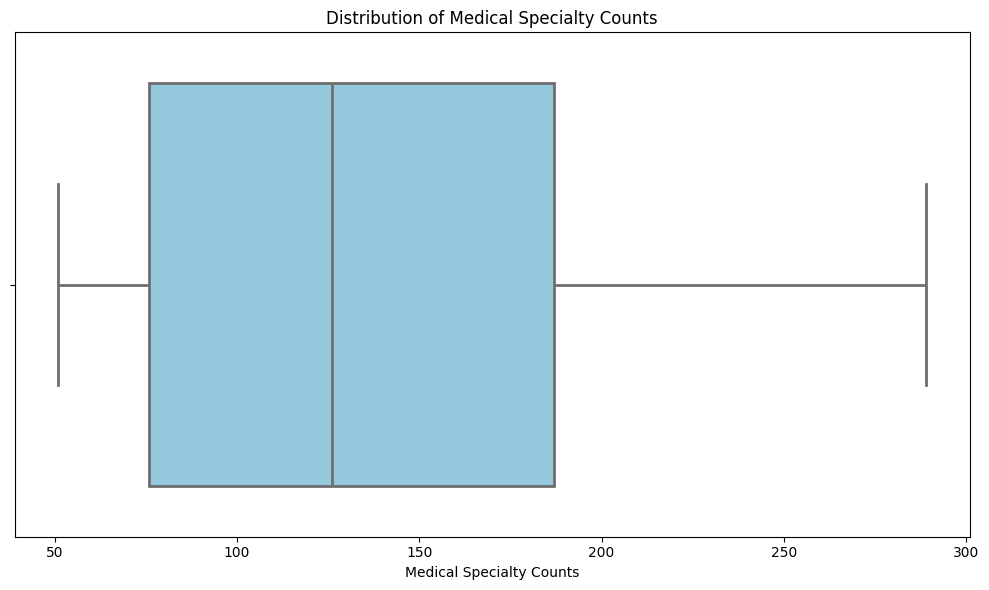

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 진료과목별 개수
specialty_counts = df['medical_specialty'].value_counts()

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=specialty_counts, color='skyblue', fliersize=10, linewidth=2)

# 제목, 레이블
plt.title("Distribution of Medical Specialty Counts")
plt.xlabel("Medical Specialty Counts")
plt.tight_layout()
plt.show()